La selección de features es el proceso de seleccionar el número óptimo de features de un conjunto más grande de features. Hay varias ventajas de este proceso de selección de features y también hay varias técnicas disponibles para este proceso de selección de características.

Ventajas:

- Mejorar la performance
- Modelos mas simple son mas faciles de interpretar
- Tiempos de entrenamientos mas cortos
- Mejor generalización, reduciendo el overfitting
- Mas facil de implementar por mlops developers si aplicase
- Reduce el riesgos de errores de datos, al usar menos datos


In [6]:
# Leemos un fichero que contiene variables categoricas

#Variables categóricas
#Los valores de una variable categórica son categorías o grupos mutuamente excluyentes.
#Los datos categóricos pueden tener o no tener un orden lógico.
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv('../../data/obesity_final.csv')

display(df)

,gender,age,height,weight,family_history_with_overweight,favc,fcvc,ncp,caec,smoke,ch2o,scc,faf,tue,bad_habits,calc,mtrans,nobeyesdad
0,Female,21,162.0,64.0,yes,no,2.00,3.0,Sometimes,no,2.00,no,0.00,1.00,1,no,Public_Transportation,Normal_Weight
1,Male,23,180.0,77.0,yes,no,2.00,3.0,Sometimes,no,2.00,no,2.00,1.00,1,Frequently,Public_Transportation,Normal_Weight
2,Male,27,180.0,87.0,no,no,3.00,3.0,Sometimes,no,2.00,no,2.00,0.00,1,Frequently,Walking,Overweight_Level_I
3,Male,22,178.0,89.8,no,no,2.00,1.0,Sometimes,no,2.00,no,0.00,0.00,1,Sometimes,Public_Transportation,Overweight_Level_II
4,Male,29,162.0,53.0,no,yes,2.00,3.0,Sometimes,no,2.00,no,0.00,0.00,1,Sometimes,Automobile,Normal_Weight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2131,Male,30,191.0,129.0,yes,yes,2.10,3.0,Sometimes,yes,1.01,no,0.98,0.04,0,Sometimes,Public_Transportation,Obesity_Type_II
2132,Male,31,187.0,127.0,yes,yes,2.73,3.0,Sometimes,yes,1.48,no,1.48,1.15,0,Sometimes,Public_Transportation,Obesity_Type_II
2133,Male,30,190.0,129.0,yes,yes,2.22,3.0,Sometimes,yes,1.59,no,1.39,0.91,0,Sometimes,Public_Transportation,Obesity_Type_II
2134,Male,31,184.0,125.0,yes,yes,2.49,3.0,Sometimes,yes,1.66,no,0.99,0.21,0,Sometimes,Public_Transportation,Obesity_Type_II


## Metodos de filtrado

- Estos métodos se basan en las características de los datos
- No utilizan algoritmos
- son independientes del modelo
- Tienden a ser menos costosos computacionalmente
- Por lo general, brindan un rendimiento de predicción más bajo que los métodos de wrapper
- Son muy adecuados para una limpieza rápida de caracterisiticas

## Categorical Input Pearson's chi-squared

#### test estadistico para ver la independencia de 2 variables categoricas, las variables que son independientes de la variable objetivo serian las candidatas a ser eliminadas


- https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html
  - k:Number of top features to select. The “all” option bypasses selection, for use in a parameter search.
  - Select features according to the k highest scores.


- chi-cuadrado: aquí hacemos una prueba de independencia para determinar si existe una relación significativa entre cada característica del conjunto de datos y la variable objetivo, estableciendo dos hipótesis:
  - H0: No hay relación entre las variables
  - H1: Existe una relación entre las variables.

  - Luego evaluamos los datos para el nivel de significación (a menudo elegido 0,05) y aquellas características que dan como resultado un valor p superior a 0,05 no implican ninguna relación, por lo tanto, esas características muestran independencia de la variable objetivo y podrían eliminarse del conjunto de datos.

Feature 0: 329.764951
Feature 1: 1543.148252
Feature 2: 753.372126
Feature 3: 147800.691896
Feature 4: 117.439670
Feature 5: 26.965124
Feature 6: 11611.891846
Feature 7: 4748.678401
Feature 8: 48.415026
Feature 9: 32.346700
Feature 10: 3530.487390
Feature 11: 116.624187
Feature 12: 5502.730196
Feature 13: 2414.526675
Feature 14: 0.680332
Feature 15: 22.253169
Feature 16: 101.695813


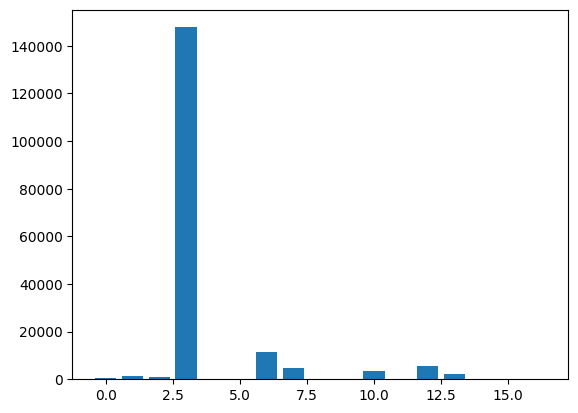

In [7]:
#Pearson's chi-squared: test estadistico para ver la independencia de 2 variables categoricas, las variables que son independientes de la variable objetivo serian las candidatas a ser eliminadas
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectPercentile,chi2
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from matplotlib import pyplot
import random
import numpy as np
np.random.seed(10)
random.seed(10)

data=df
data = data.values
# todas las variables menos la ultima
X = data[:, :-1]
#la ultima variable
y = data[:,-1]
# si infer_schema = "false" entonces los pasamos a string
X = X.astype(str)
#En la codificación ordinal, a cada valor de categoría único se le asigna un valor entero. Por ejemplo, rojo es 1, verde es 2 y azul es 3.
oe = OrdinalEncoder()
oe.fit(X)
X = oe.transform(X)
#También necesitamos preparar la variable objetivo. Es un problema de clasificación binaria, por lo que necesitamos asignar las dos etiquetas 0 y 1.
#scikit-learn proporciona la clase LabelEncoder para ello. Podríamos usar OrdinalEncoder y obtener el mismo resultado

le = LabelEncoder()
le.fit(y)
y = le.transform(y)
# feature selection filtrado
fs = SelectKBest(score_func=chi2, k='all')#SI K=2 cogemos las 2 caracteristitcas con mayor scoring


fs.fit(X, y)
X_fs = fs.transform(X)
#cuanto mas alta mejor por que mas dependientes son
for i in range(len(fs.scores_)):
  print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

###Este método selecciona características de acuerdo con las k puntuaciones más altas.

- Mutual information: mide la dependencia mutua de las dos variables, es decir, mide la reducción de la incertidumbre (entropía) de una variable aleatoria, X, debido al conocimiento del valor de otra variable aleatoria Y. por ejemplo, si X e Y son independientes, entonces conocer X no da información sobre Y y viceversa, por lo que su información mutua es cero.

- Mi definicion de andar por casa: mide cuánta información contribuye la presencia/ausencia de una feature para hacer la predicción correcta sobre el target.

- Aquí usamos la ganancia de información entre dos variables, que mide la reducción de la incertidumbre de una variable dado un valor conocido de la otra variable. Esta puntuación caerá en el rango de 0 a 1

- WIKIPEDIA:
Mutual information measures the information that X and Y share: It measures how much knowing one of these variables reduces uncertainty about the other. For example, if X and Y are independent, then knowing X does not give any information about Y and vice versa, so their mutual information is zero. At the other extreme, if X is a deterministic function of Y and Y is a deterministic function of X then all information conveyed by X is shared with Y: knowing X determines the value of Y and vice versa. As a result, in this case the mutual information is the same as the uncertainty contained in Y (or X) alone, namely the entropy of Y (or X). Moreover, this mutual information is the same as the entropy of X and as the entropy of Y. (A very special case of this is when X and Y are the same random variable.)

Feature 0: 0.223990
Feature 1: 0.343819
Feature 2: 0.217599
Feature 3: 1.231047
Feature 4: 0.165674
Feature 5: 0.055822
Feature 6: 0.360763
Feature 7: 0.253422
Feature 8: 0.172623
Feature 9: 0.024685
Feature 10: 0.283533
Feature 11: 0.009246
Feature 12: 0.274153
Feature 13: 0.241580
Feature 14: 0.000000
Feature 15: 0.104787
Feature 16: 0.072782


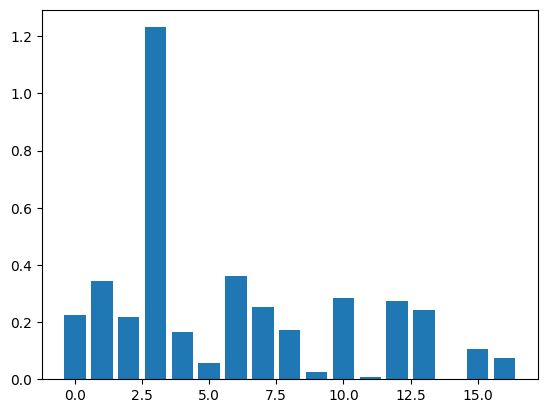

In [8]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from matplotlib import pyplot

import random
import numpy as np
np.random.seed(10)
random.seed(10)


data=df
data = data.values
# todas las variables menos la ultima
X = data[:, :-1]
#la ultima variable
y = data[:,-1]
# si infer_schema = "false" entonces los pasamos a string
#X = X.astype(str)
#En la codificación ordinal, a cada valor de categoría único se le asigna un valor entero. Por ejemplo, rojo es 1, verde es 2 y azul es 3.
oe = OrdinalEncoder()
oe.fit(X)
X = oe.transform(X)
#También necesitamos preparar la variable objetivo. Es un problema de clasificación binaria, por lo que necesitamos asignar las dos etiquetas 0 y 1.
#scikit-learn proporciona la clase LabelEncoder para ello. Podríamos usar OrdinalEncoder y obtener el mismo resultado

le = LabelEncoder()
le.fit(y)
y = le.transform(y)
# feature selection
fs = SelectKBest(score_func=mutual_info_classif, k='all')
fs.fit(X, y)
X_fs = fs.transform(X)
#cuanto mas alta mejor por que mas dependientes son
for i in range(len(fs.scores_)):
  print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

## Numerical Input

- ANOVA se usa cuando una variable es numérica y otra es categórica (variables de entrada numéricas y una variable objetivo categorica)
- ANOVA: significa análisis de la varianza. Es una técnica estadística que señala si dos variables (una independiente y otra dependiente) están relacionadas en base a si las medias de la variable dependiente son diferentes en las categorías o grupos de la variable independiente. Es decir, señala si las medias entre dos o más grupos son similares o diferentes.

In [9]:
display(df)

,gender,age,height,weight,family_history_with_overweight,favc,fcvc,ncp,caec,smoke,ch2o,scc,faf,tue,bad_habits,calc,mtrans,nobeyesdad
0,Female,21,162.0,64.0,yes,no,2.00,3.0,Sometimes,no,2.00,no,0.00,1.00,1,no,Public_Transportation,Normal_Weight
1,Male,23,180.0,77.0,yes,no,2.00,3.0,Sometimes,no,2.00,no,2.00,1.00,1,Frequently,Public_Transportation,Normal_Weight
2,Male,27,180.0,87.0,no,no,3.00,3.0,Sometimes,no,2.00,no,2.00,0.00,1,Frequently,Walking,Overweight_Level_I
3,Male,22,178.0,89.8,no,no,2.00,1.0,Sometimes,no,2.00,no,0.00,0.00,1,Sometimes,Public_Transportation,Overweight_Level_II
4,Male,29,162.0,53.0,no,yes,2.00,3.0,Sometimes,no,2.00,no,0.00,0.00,1,Sometimes,Automobile,Normal_Weight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2131,Male,30,191.0,129.0,yes,yes,2.10,3.0,Sometimes,yes,1.01,no,0.98,0.04,0,Sometimes,Public_Transportation,Obesity_Type_II
2132,Male,31,187.0,127.0,yes,yes,2.73,3.0,Sometimes,yes,1.48,no,1.48,1.15,0,Sometimes,Public_Transportation,Obesity_Type_II
2133,Male,30,190.0,129.0,yes,yes,2.22,3.0,Sometimes,yes,1.59,no,1.39,0.91,0,Sometimes,Public_Transportation,Obesity_Type_II
2134,Male,31,184.0,125.0,yes,yes,2.49,3.0,Sometimes,yes,1.66,no,0.99,0.21,0,Sometimes,Public_Transportation,Obesity_Type_II


Feature 0: 159.800595
Feature 1: 80.568215
Feature 2: 36.547150
Feature 3: 2406.075520
Feature 4: 148.529586
Feature 5: 43.287852
Feature 6: 119.182612
Feature 7: 28.947186
Feature 8: 83.334850
Feature 9: 5.572631
Feature 10: 16.471468
Feature 11: 21.515373
Feature 12: 14.890058
Feature 13: 7.527691
Feature 14: 5.572631
Feature 15: 34.651705
Feature 16: 26.965528
Reduced number of features: 17


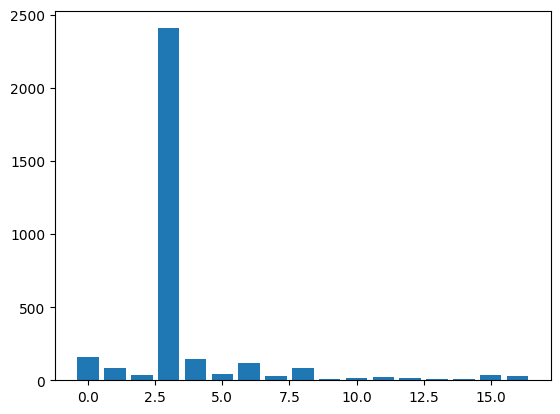

In [11]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from matplotlib import pyplot
import random
import numpy as np
np.random.seed(10)
random.seed(10)

data=df
data = data.values
# todas las variables menos la ultima
X = data[:, :-1]
#la ultima variable
y = data[:,-1]

# En la codificación ordinal, a cada valor de categoría único se le asigna un valor entero.
oe = OrdinalEncoder()
oe.fit(X)
X = oe.transform(X)

# Necesitamos preparar la variable objetivo. Es un problema de clasificación binaria, por lo que necesitamos asignar las dos etiquetas 0 y 1.
# scikit-learn proporciona la clase LabelEncoder para ello. Podríamos usar OrdinalEncoder y obtener el mismo resultado
le = LabelEncoder()
le.fit(y)
y = le.transform(y)

# feature selection
# scikit-learn proporciona una implementación del test ANOVA usando la funcion f_classif
fs = SelectKBest(score_func=f_classif, k='all')
fs.fit(X, y)
X_fs = fs.transform(X)

# cuanto mas alta mejor por que mas dependientes son
for i in range(len(fs.scores_)):
  print('Feature %d: %f' % (i, fs.scores_[i]))

print('Reduced number of features:', X_fs.shape[1])

# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

## Numerical output

La correlación es una medida de cómo dos variables cambian juntas. Quizás la más común es la correlación de Pearson que supone una distribución gaussiana para cada variable.
Esta medida la podemos conseguir con la funcion de scikit-learn f regression

- Las buenas variables están altamente correlacionadas con el objetivo
- Las variables predictoras correlacionadas proporcionan información redundante
- Las variables deben estar correlacionadas con el objetivo pero no correlacionadas entre sí.


- Usando la correlación de Pearson, nuestros valores de coeficiente devueltos variarán entre -1 y 1.

- Si la correlación entre dos features es 0, significa que cambiar cualquiera de estas dos features no afectará a la otra.

- Si la correlación entre dos características es mayor que 0, esto significa que al aumentar los valores en una característica, también aumentarán los valores en la otra característica (cuanto más cercano sea el coeficiente de correlación a 1, más fuerte será este vínculo entre los dos)

- Si la correlación entre dos características es menor que 0, esto significa que aumentar los valores en una característica hará disminuir los valores en la otra característica (cuanto más cerca esté el coeficiente de correlación a -1 , más fuerte será esta relación entre las dos

### Wrapper

- Busca subconjuntos de funciones que funcionan según un modelo predictivo.

- Recursive Feature Elimination o RFE, es un metodo muy popular que vale tanto para modelos de regresion como de clasificacion

  - RFE es popular porque es fácil de configurar y usar y porque es efectivo para seleccionar aquellas features en un conjunto de datos de entrenamiento que son más relevantes para predecir la variable objetivo.

  - Hay dos opciones de configuración importantes cuando se usa RFE: la elección del número de features a seleccionar y la elección del algoritmo utilizado para ayudar a elegir las features. Ambos hiperparámetros se pueden explorar, aunque el rendimiento del método no depende en gran medida de que estos hiperparámetros estén bien configurados.

  - La eliminación recursiva de características es un ejemplo de eliminación de características hacia atrás, en el que esencialmente primero ajustamos nuestro modelo usando todas las características en un conjunto dado, luego, progresivamente, una por una, eliminamos las características menos significativas, volviendo a ajustar cada vez , hasta que nos quede el número deseado de características, que se establece mediante el parámetro n_features_to_select.

- RFE(estimator=RandomForestClassifier(), n_features_to_select=5)


In [18]:
from sklearn.datasets import make_classification
from sklearn.datasets import make_classification
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from numpy import mean
from numpy import std
# define dataset
import random
import numpy as np
np.random.seed(10)
random.seed(10)

X, y = make_classification(n_samples=1000, n_features=10)

# create pipeline
#modemos usar otros modelos de clasificacion RandomForestClassifier
#rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
rfe = RFE(estimator=LogisticRegression(), n_features_to_select=5)
model = LogisticRegression()
# #Pûedes usar otro modelo DecisionTreeClassifier, RandomForestClassifier
# rfe.fit(X, y)
# # summarize all features
# for i in range(X.shape[1]):
#   print('Column: %d, Selected=%s, Rank: %d' % (i, rfe.support_[i], rfe.ranking_[i]))

pipeline = Pipeline(steps=[('k', SimpleImputer(strategy='mean')),('s',rfe),('m',model)])

# evaluate model
cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=2, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))


# from operator import itemgetter
# import pandas as pd
# features = pd.DataFrame(X).columns.to_list()
# for x, y in (sorted(zip(rfe.ranking_ , features), key=itemgetter(0))):
#     print(x, y)

Accuracy: 0.864 (0.013)


- También es posible seleccionar automáticamente el número de características elegidas por RFE.

- Esto se puede lograr realizando una evaluación de validación cruzada de diferentes cantidades de features como hicimos en la sección anterior y seleccionando automáticamente la cantidad de features que dieron como resultado la mejor puntuación media.

- La clase RFECV implementa esto

  - La RFECV se configura igual que la clase RFE en cuanto a la elección del algoritmo que se envuelve. Además, el número mínimo de características a considerar se puede especificar a través del argumento "min_features_to_select" (predeterminado en 1)



In [24]:
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFECV
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from numpy import mean
from numpy import std
import random
import numpy as np

np.random.seed(10)
random.seed(10)

# define dataset
X, y = make_classification(n_samples=1000, n_features=10)
# summarize the dataset
print(X.shape, y.shape)

# Recursive Feature Elimination with Cross-Validation
rfecv = RFECV(estimator=XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
rfecv.fit(X, y)

# summarize all features
for i in range(X.shape[1]):
  print('Column: %d, Selected=%s, Rank: %d' % (i, rfecv.support_[i], rfecv.ranking_[i]))

model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

pipeline = Pipeline(steps=[('s',rfecv),('m',model)])

# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

(1000, 10) (1000,)
Column: 0, Selected=True, Rank: 1
Column: 1, Selected=True, Rank: 1
Column: 2, Selected=True, Rank: 1
Column: 3, Selected=True, Rank: 1
Column: 4, Selected=False, Rank: 3
Column: 5, Selected=False, Rank: 4
Column: 6, Selected=True, Rank: 1
Column: 7, Selected=True, Rank: 1
Column: 8, Selected=False, Rank: 2
Column: 9, Selected=True, Rank: 1
Accuracy: 0.865 (0.028)


## Intrinseco

- Saber qué características le da más importancia a nuestro modelo puede ser de vital importancia para comprender cómo nuestro modelo está haciendo sus predicciones (y por lo tanto, hacerlo más explicable). Al mismo tiempo, podemos deshacernos de las características que no aportan ningún beneficio a nuestro modelo.

- Feature importance es la tecnica que asigna un scoring a cada input en función de cómo de útiles son para predecir una variable objetivo

Feature: 0, Score: 0.00284
Feature: 1, Score: 0.00473
Feature: 2, Score: 0.00171
Feature: 3, Score: 0.00264
Feature: 4, Score: 0.51722
Feature: 5, Score: 0.43782
Feature: 6, Score: 0.02671
Feature: 7, Score: 0.00247
Feature: 8, Score: 0.00294
Feature: 9, Score: 0.00091


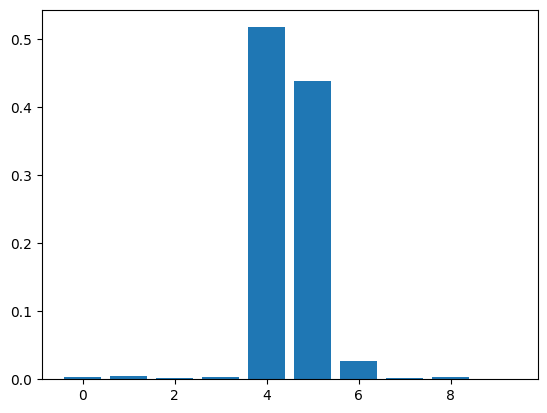

In [21]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression#modelos puros de regresion por factores
from sklearn.tree import DecisionTreeRegressor#basado en arboles
from matplotlib import pyplot
from sklearn.ensemble import RandomForestClassifier
import random
import numpy as np
np.random.seed(10)
random.seed(10)

# define dataset
#n_informativeint, default=10
#The number of informative features, i.e., the number of features used to build the linear model used to generate the output.
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
# define the model
#model = LinearRegression()# puedes usarlo con modelos tipo ridge, lasso, elasticnet
# model = RandomForestClassifier(n_estimators=100, random_state=0)
model = DecisionTreeRegressor()# puedes usarlo con modelos tipo ridge, lasso, elasticnet

# fit the model
model.fit(X, y)
# get importance
#importance = model.coef_
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
  print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()